In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')



# CSVファイルを読み込む
dfA = pd.read_csv('PSFS 2.csv',encoding = '932')
print(dfA.shape)

(3052, 38)


In [4]:
#必要な評価項目だけを抽出
dfB = dfA.drop(columns= ['評価者','評価状態','評価書式','起算日','病期','PT活動1','PT点数1','PT活動2','PT点数2','PT活動3','PT活動3','OT活動1','OT点数1','OT活動2','OT点数2','OT活動3','OT点数3','OT PSFS値','ST活動1','ST点数1','ST活動2','ST点数2','ST活動3','ST点数3','ST PSFS値','フリガナ','生年月日','年齢','更新者名','更新日','PT点数3','Unnamed: 9','Unnamed: 17','Unnamed: 25'])
dfB.shape

(3052, 5)

In [7]:
#病棟の項目をNanに変更
dfC = dfB[dfB['病棟'].isnull()]
dfC.shape

(858, 5)

In [8]:
#PT PSFSの値からNanを消去
dfD = dfC.dropna(subset=['PT PSFS値']) 
dfD.shape

(760, 5)

In [11]:
# 日付を昇順で並び替えた上で、IDごとに並べ替え
dfD['評価日'] = pd.to_datetime(dfD['評価日'])  # 日付型に変換
dfD_sorted = dfD.sort_values(by=['患者ID', '評価日']).reset_index(drop=True)

print("IDごとに並び替えられたデータ:")
dfD_sorted.shape


IDごとに並び替えられたデータ:


(760, 5)

In [14]:
# IDごとにデータをグループ化し、データ数が2以上のグループをフィルタリング
filtered_df = dfD_sorted.groupby('患者ID').filter(lambda x: len(x) >= 2)
print(f"ユニークなID数: {len(filtered_df['患者ID'].unique())}")
filtered_df[:5]

ユニークなID数: 194


,評価日,患者ID,病棟,評価時期,PT PSFS値
2,2024-01-23,31617,NaN,4w,5.67
3,2024-02-21,31617,NaN,8w,10.00
4,2024-02-28,31617,NaN,10w,10.00
5,2024-05-14,41938,NaN,0w,6.67
6,2024-06-11,41938,NaN,0w,6.67


In [17]:
# グループごとに最初と最後のデータを取得
first = filtered_df.groupby('患者ID').first().reset_index()  # 各グループの最初の行
last = filtered_df.groupby('患者ID').last().reset_index()    # 各グループの最後の行




# 最初と最後のデータを結合して、昇順にソートし直す
first_last_combine = pd.concat([first, last]).sort_values(by=['患者ID', '評価日']).reset_index(drop=True)

print("\n各グループの最初と最後のデータ（昇順）:")
first_last_combine.shape


各グループの最初と最後のデータ（昇順）:


(388, 5)

In [33]:
# 各グループの最初の値を変換する関数
def transform_first_value(group):
    group.iloc[0] = 0  # 最初の値を0に変換
    group.iloc[-1] = 1 #最後の値を1に変換
    return group

# 'value' 列に対して各グループに処理を適用
first_last_combine['評価時期'] = first_last_combine.groupby('患者ID')['評価時期'].transform(transform_first_value)

# 結果を表示
first_last_combine

,患者ID,評価日,病棟,評価時期,PT PSFS値
0,31617,2024-01-23,None,0,5.67
1,31617,2024-02-28,None,1,10.00
2,41938,2024-05-14,None,0,6.67
3,41938,2024-07-11,None,1,8.67
4,44987,2024-04-01,None,0,2.00
5,44987,2024-08-28,None,1,10.00
6,50942,2024-01-05,None,0,2.00
7,50942,2024-06-24,None,1,3.33
8,60315,2024-04-22,None,0,3.33
9,60315,2024-08-30,None,1,6.00


In [36]:


# --- 1. 介入前データの抽出と計算 ---
df_bef = first_last_combine.query("評価日 <= '2024-05-01'")
# 2回以上評価がある患者のみ抽出
df_bef = df_bef.groupby('患者ID').filter(lambda x: len(x) >= 2)

# pivotを使って、患者IDごとに「評価時期0」と「評価時期1」を横に並べる
df0_pivot = df_bef.pivot(index='患者ID', columns='評価時期', values='PT PSFS値')
# 差分（1 - 0）を計算
df0 = pd.DataFrame()
df0['PSFS変化値'] = df0_pivot[1] - df0_pivot[0]
df0['介入'] = "介入前"

# --- 2. 介入後データの抽出と計算 ---
df_aft = first_last_combine.query("評価日 > '2024-05-01'")
df_aft = df_aft.groupby('患者ID').filter(lambda x: len(x) >= 2)

# 同様にpivotで計算
df1_pivot = df_aft.pivot(index='患者ID', columns='評価時期', values='PT PSFS値')
df1 = pd.DataFrame()
df1['PSFS変化値'] = df1_pivot[1] - df1_pivot[0]
df1['介入'] = "介入後"

# --- 3. データの結合 ---
ana_df = pd.concat([df0, df1], axis=0).reset_index(drop=True)

# 結果の表示
print(ana_df.head())


   PSFS変化値   介入
0     4.33  介入前
1     0.00  介入前
2     1.00  介入前
3     9.00  介入前
4     0.33  介入前


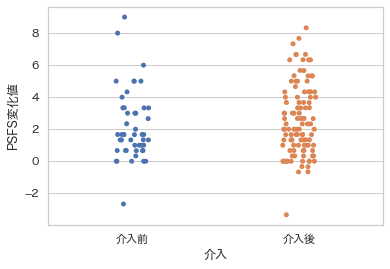

,count,mean,std,min,25%,50%,75%,max
介入,,,,,,,,
介入前,48.0,2.180208,2.152658,-2.67,0.67,1.665,3.33,9.00
介入後,106.0,2.581226,2.217847,-3.34,1.00,2.165,4.00,8.33


In [37]:
sns.stripplot(data=ana_df, x='介入', y='PSFS変化値');
plt.show()
ana_df.groupby('介入')['PSFS変化値'].describe()

In [39]:
from scipy import stats
A = ana_df[ana_df["介入"]=="介入前"]["PSFS変化値"]
B = ana_df[ana_df["介入"]=="介入後"]["PSFS変化値"]
t_stat, p_value = stats.ttest_ind(B, A)
print(f"T値：{t_stat:.3f}")
print(f"P値：{p_value:.3f}")

T値：1.049
P値：0.296


In [40]:
# 平均と標準偏差
mean_A, mean_B = np.mean(A), np.mean(B)
std_A, std_B = np.std(A, ddof=1), np.std(B, ddof=1)

# サンプルサイズ
n_A, n_B = len(A), len(B)

# 合併標準偏差の計算
pooled_std = np.sqrt(((n_A - 1) * std_A ** 2 + (n_B - 1) * std_B ** 2) / (n_A + n_B - 2))

# Cohen's dの計算
cohens_d = (mean_B - mean_A) / pooled_std
print(f"Cohen's d:{cohens_d:.3f}")


Cohen's d:0.182
